<a href="https://colab.research.google.com/github/RockstarAryan/Sentiment-Analysis-with-LSTM-using-PyTorch/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
device = torch.device("cuda")

In [ ]:

from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()


Saving reviews.csv to reviews.csv


In [ ]:
import pandas as pd
rev = pd.read_csv('reviews.csv')

In [ ]:
#remove HTML tags
import re

def remove_html_tags(string):
    pattern = r'<[^>]*>'
    result = re.sub(pattern, ' ', string)
    return result
rev['review'] = rev['review'].apply(lambda x : remove_html_tags(x))
rev.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming t...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
rev['review']= rev['review'].apply(lambda x:remove_punctuation(x))
#lowercase the entire thing
rev['review']= rev['review'].apply(lambda x: x.lower())

pd.set_option('display.max_colwidth',None)
rev.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,positive
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his closet which totally ruins all t

In [ ]:
import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
#applying function to the column
rev['review'] = rev['review'].apply(lambda x: tokenization(x))
rev.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentioned, that, after, watching, just, 1, oz, episode, youll, be, hooked, they, are, right, as, this, is, exactly, what, happened, with, me, the, first, thing, that, struck, me, about, oz, was, its, brutality, and, unflinching, scenes, of, violence, which, set, in, right, from, the, word, go, trust, me, this, is, not, a, show, for, the, faint, hearted, or, timid, this, show, pulls, no, punches, with, regards, to, drugs, sex, or, violence, its, is, hardcore, in, the, classic, use, of, the, word, it, is, called, oz, as, that, is, the, nickname, given, to, the, oswald, ...]",positive
1,"[a, wonderful, little, production, the, filming, technique, is, very, unassuming, very, oldtimebbc, fashion, and, gives, a, comforting, and, sometimes, discomforting, sense, of, realism, to, the, entire, piece, the, actors, are, extremely, well, chosen, michael, sheen, not, only, has, got, all, the, polari, but, he, has, all, the, voices, down, pat, too, you, can, truly, see, the, seamless, editing, guided, by, the, references, to, williams, diary, entries, not, only, is, it, well, worth, the, watching, but, it, is, a, terrificly, written, and, performed, piece, a, masterful, production, about, one, of, the, great, masters, of, comedy, and, his, life, the, realism, really, ...]",positive
2,"[i, thought, this, was, a, wonderful, way, to, spend, time, on, a, too, hot, summer, weekend, sitting, in, the, air, conditioned, theater, and, watching, a, lighthearted, comedy, the, plot, is, simplistic, but, the, dialogue, is, witty, and, the, characters, are, likable, even, the, well, bread, suspected, serial, killer, while, some, may, be, disappointed, when, they, realize, this, is, not, match, point, 2, risk, addiction, i, thought, it, was, proof, that, woody, allen, is, still, fully, in, control, of, the, style, many, of, us, have, grown, to, love, this, was, the, most, id, laughed, at, one, of, woodys, comedies, in, years, ...]",positive
3,"[basically, theres, a, family, where, a, little, boy, jake, thinks, theres, a, zombie, in, his, closet, his, parents, are, fighting, all, the, time, this, movie, is, slower, than, a, soap, opera, and, suddenly, jake, decides, to, become, rambo, and, kill, the, zombie, ok, first, of, all, when, youre, going, to, make, a, film, you, must, decide, if, its, a, thriller, or, a, drama, as, a, drama, the, movie, is, watchable, parents, are, divorcing, arguing, like, in, real, life, and, then, we, have, jake, with, his, closet, which, totally, ruins, all, the, film, i, expected, to, see, a, boogeyman, similar, movie, ...]",negative
4,"[petter, matteis, love, in, the, time, of, money, is, a, visually, stunning, film, to, watch, mr, mattei, offers, us, a, vivid, portrait, about, human, relations, this, is, a, movie, that, seems, to, be, telling, us, what, money, power, and, success, do, to, people, in, the, different, situations, we, encounter, this, being, a, variation, on, the, arthur, schnitzlers, play, about, the, same, theme, the, director, transfers, the, action, to, the, present, time, new, york, where, all, these, different, characters, meet, and, connect, each, one, is, connected, in, one, way, or, another, to, the, next, person, but, no, one, seems, to, know, ...]",positive


In [ ]:
#to remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output
#applying the function
rev['review'] = rev['review'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
rev.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, episode, youll, hooked, right, exactly, happened, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pulls, punches, regards, drugs, sex, violence, hardcore, classic, use, word, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, high, agenda, em, city, home, manyaryans, muslims, gangstas, latinos, christians, italians, irish, moreso, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, goes, shows, wouldnt, dare, forget, pretty, pictures, painted, ...]",positive
1,"[wonderful, little, production, filming, technique, unassuming, oldtimebbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, got, polari, voices, pat, truly, see, seamless, editing, guided, references, williams, diary, entries, well, worth, watching, terrificly, written, performed, piece, masterful, production, one, great, masters, comedy, life, realism, really, comes, home, little, things, fantasy, guard, rather, use, traditional, dream, techniques, remains, solid, disappears, plays, knowledge, senses, particularly, scenes, concerning, orton, halliwell, sets, particularly, flat, halliwells, murals, decorating, every, surface, terribly, well, done]",positive
2,"[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watching, lighthearted, comedy, plot, simplistic, dialogue, witty, characters, likable, even, well, bread, suspected, serial, killer, may, disappointed, realize, match, point, 2, risk, addiction, thought, proof, woody, allen, still, fully, control, style, many, us, grown, love, id, laughed, one, woodys, comedies, years, dare, say, decade, ive, never, impressed, scarlet, johanson, managed, tone, sexy, image, jumped, right, average, spirited, young, woman, may, crown, jewel, career, wittier, devil, wears, prada, interesting, superman, great, comedy, go, see, friends]",positive
3,"[basically, theres, family, little, boy, jake, thinks, theres, zombie, closet, parents, fighting, time, movie, slower, soap, opera, suddenly, jake, decides, become, rambo, kill, zombie, ok, first, youre, going, make, film, must, decide, thriller, drama, drama, movie, watchable, parents, divorcing, arguing, like, real, life, jake, closet, totally, ruins, film, expected, see, boogeyman, similar, movie, instead, watched, drama, meaningless, thriller, spots, 3, 10, well, playing, parents, descent, dialogs, shots, jake, ignore]",negative
4,"[petter, matteis, love, time, money, visually, stunning, film, watch, mr, mattei, offers, us, vivid, portrait, human, relations, movie, seems, telling, us, money, power, success, people, different, situations, encounter, variation, arthur, schnitzlers, play, theme, director, transfers, action, present, time, new, york, different, characters, meet, connect, one, connected, one, way, another, next, person, one, seems, know, previous, point, contact, stylishly, film, sophisticated, luxurious, look, taken, see, people, live, world, live, habitat, thing, one, gets, souls, picture, different, stages, loneliness, one, inhabits, big, city, exactly, best, place, human, relations, find, sincere, fulfillment, one, discerns, case, people, encounter, acting, good, mr, matteis, direction, steve, ...]",positive


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
rev['review'] = rev['review'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(rev.shape)

(50000, 2)


In [ ]:
sm = 0
for i in range(rev.shape[0]):
    sm += len(rev.iloc[i]['review'])
print("Average length of each review : ",sm/rev.shape[0])
pos = 0
for i in range(rev.shape[0]):
    if rev.iloc[i]['sentiment'] == 'positive':
        pos = pos + 1
neg = rev.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/rev.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/rev.shape[0]*100)+"%")


Average length of each review :  120.28422
Percentage of reviews with positive sentiment is 50.0%
Percentage of reviews with negative sentiment is 50.0%


In [ ]:
maxlen = 0
for i in range(rev.shape[0]):
    if maxlen < len(rev.iloc[i]['review']):
        maxlen = len(rev.iloc[i]['review'])
print(maxlen)

1438


In [ ]:
#To split data into training and testing set
from sklearn.model_selection import train_test_split
X,y = rev['review'].values,rev['sentiment'].values
rev_train,rev_test,sen_train,sen_test = train_test_split(X,y,stratify=y)
print('shape of train data is ',rev_train.shape)
print('shape of test data is ',rev_test.shape)

shape of train data is  (37500,)
shape of test data is  (12500,)


In [ ]:
sen_train = [1 if label =='positive' else 0 for label in sen_train]
sen_test = [1 if label =='positive' else 0 for label in sen_test]

In [ ]:
word_list = []
for i in range(len(rev_train)):
    for j in rev_train[i]:
        word_list.append(j)
print(len(word_list))

4519375


In [ ]:
from collections import Counter
corpus = Counter(word_list)
# sorting on the basis of most common words
corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:5000]
# creating a dict
vocab = {w:i+1 for i,w in enumerate(corpus_)}



In [ ]:
import numpy as np

In [ ]:
final_train,final_test = [],[]
for sent in rev_train:
    final_train.append([vocab[word] for word in sent
        if (word) in vocab.keys()])
for sent in rev_test:
    final_test.append([vocab[word] for word in sent
        if (word) in vocab.keys()])
final_train = np.array(final_train)
final_test = np.array(final_test)
sen_train = np.array(sen_train)
sen_test = np.array(sen_test)

<ipython-input-18-3416d485e123>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final_train = np.array(final_train)
<ipython-input-18-3416d485e123>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final_test = np.array(final_test)


In [ ]:
print(final_train)

[list([2, 758, 2195, 1273, 111, 1019, 4238, 654, 2291, 222, 163, 728, 159, 232, 1177, 210, 3606, 585, 419, 723, 1177, 135, 1568, 1439, 2935, 1364, 623, 15, 333, 1439, 563, 3843, 1273, 355, 203, 606, 185, 444, 613, 2060, 3, 1168])
 list([266, 277, 1915, 1930, 2, 63, 98, 92, 245, 547, 331, 1445, 186, 186, 2340, 555, 46, 165, 6, 1659, 2, 564, 278, 2, 4053, 343, 2, 328, 4080, 1767, 773, 278, 15, 142, 1, 1894, 611, 184, 1121, 252, 248, 3324, 335, 970, 407])
 list([163, 1702, 78, 6, 1, 2071, 1895, 836, 1, 1164, 304, 93, 6, 1, 240, 536, 448, 2203, 779, 989, 407])
 ...
 list([4, 1065, 467, 23, 4, 2169, 1, 34, 1, 1, 19, 1288, 395, 44, 1210, 109, 29, 33, 311, 340, 25, 1, 199, 10, 357, 3731, 32, 1])
 list([20, 2137, 121, 2406, 181, 2173, 1325, 192, 593, 155, 661, 10, 143, 1103, 35, 2273, 1012, 247, 2397, 728, 395, 3979, 1057, 2552, 1754, 3561, 136, 584, 1657, 2127, 11, 70, 69, 421, 18, 66, 1223, 47, 207, 29, 80, 2127, 663, 863, 2036, 1336, 1392, 280, 4981, 572, 18, 25, 368, 324, 1690, 18, 11, 53,

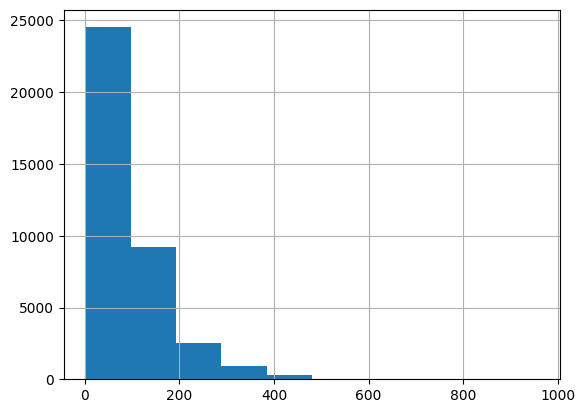

count    37500.000000
mean       100.139840
std         72.908348
min          3.000000
25%         55.000000
50%         76.000000
75%        122.000000
max        956.000000
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
rev_len = [len(i) for i in final_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [ ]:
def padding(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features
final_train = padding(final_train,500)
final_test = padding(final_test,500)

In [ ]:
print(final_train)

[[   0    0    0 ... 2060    3 1168]
 [   0    0    0 ...  335  970  407]
 [   0    0    0 ...  779  989  407]
 ...
 [   0    0    0 ... 3731   32    1]
 [   0    0    0 ...    3 1216 2220]
 [   0    0    0 ...   28  403    1]]


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader,TensorDataset
from torchvision import datasets, transforms

In [ ]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(final_train), torch.from_numpy(sen_train))
test_data = TensorDataset(torch.from_numpy(final_test), torch.from_numpy(sen_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[   0,    0,    0,  ..., 1319,  491, 2509],
        [   0,    0,    0,  ...,  169, 1872, 3668],
        [   0,    0,    0,  ...,    2,  521,  794],
        ...,
        [   0,    0,    0,  ...,  308, 1547,  319],
        [   0,    0,    0,  ...,  456,   48,   36],
        [   0,    0,    0,  ...,  786,  326,    5]])
Sample input: 
 tensor([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0])


In [ ]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden



    def init_hidden(self, batch_size):
        #Initializes hidden state
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [ ]:
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
output_dim = 1
hidden_dim = 256



model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

model.to(device)
print(model)

SentimentRNN(
  (embedding): Embedding(5001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [ ]:
import torch.nn.functional as F

In [ ]:
import os

In [ ]:



clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in test_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(test_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        save_path = '../working/state_dict.pt'
        os.makedirs(os.path.dirname(save_path), exist_ok=True)  # Ensure the directory exists
        torch.save(model.state_dict(), save_path)
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.29036763283610345 val_loss : 0.29837098813056945
train_accuracy : 88.11733333333333 val_accuracy : 87.35199999999999
Validation loss decreased (inf --> 0.298371).  Saving model ...
Epoch 2
train_loss : 0.23996494852999847 val_loss : 0.2883373649120331
train_accuracy : 90.45866666666666 val_accuracy : 88.128
Validation loss decreased (0.298371 --> 0.288337).  Saving model ...
Epoch 3
train_loss : 0.1965464536299308 val_loss : 0.2903507040143013
train_accuracy : 92.35733333333333 val_accuracy : 88.80799999999999
Epoch 4
train_loss : 0.15299269147713979 val_loss : 0.33156892397999765
train_accuracy : 94.16799999999999 val_accuracy : 88.12
Epoch 5
train_loss : 0.09627698777119319 val_loss : 0.4012298856377602
train_accuracy : 96.44800000000001 val_accuracy : 88.248


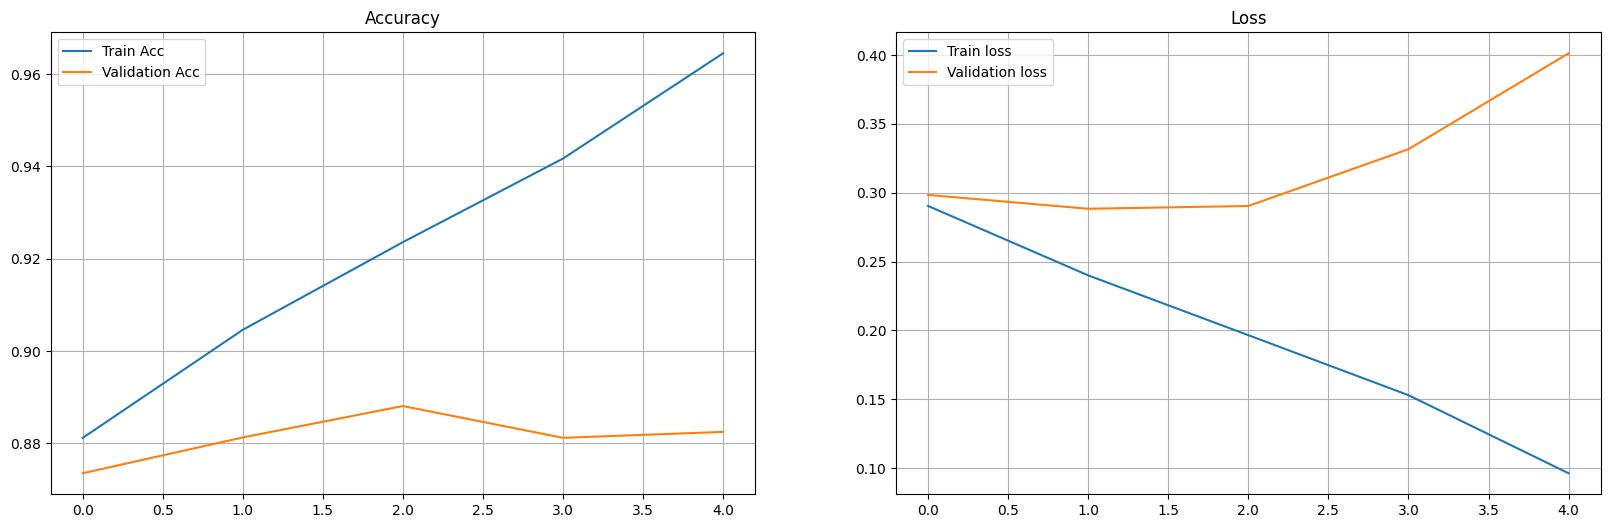

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()